In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
GloVe =[0.7540 , 0.6199 , 0.3722 , 0.7216 , 0.6480 , 0.6486 , 0.3474 , 0.2038]

HARD = [0.7648 , 0.6207 , 0.3720 , 0.7212 , 0.6468 , 0.6504 , 0.3501 ,0.2034]
# 
GN = [0.7457 , 0.6286 , 0.3989 , 0.7446 , 0.6617 , 0.6619 , 0.3700 , 0.2219]

GP = [0.7546 , 0.6003 , 0.3450, 0.6974 , 0.6418 , 0.6391 , 0.3389 , 0.1877]

GPGN = [0.7248 , 0.6355,0.4299,0.7522,0.6650,0.6791 , 0.3843 , 0.2312]

HSR = [0.7764 ,0.6554 , 0.3868 , 0.7353 ,0.6335 , 0.6652 ,0.3971,0.2635]

DHD = [0.7478 , 0.5699 , 0.3183, 0.6815 , 0.6284, 0.6175 , 0.3170 , 0.1748]

RAN = [0.7651 , 0.6176 , 0.3753 , 0.7205 , 0.6462 , 0.6430 , 0.3424 , 0.2061]
RAN_HSR = [0.7916, 0.6445, 0.3942, 0.7432, 0.6574, 0.6630, 0.3680, 0.2300]

In [3]:
data = pd.DataFrame([GloVe, HARD, GN, GP, GPGN, HSR, DHD, RAN, RAN_HSR], index=['GloVe','HARD','GN','GP','GP-GN','HSR','DHD','RAN', 'RAN-HSR'])

In [4]:
data['MEAN'] = data.mean(axis=1)
data['STD']=data.std(axis=1)
data['METHODS']=data.index

In [5]:
data

,0,1,2,3,4,5,6,7,MEAN,STD,METHODS
GloVe,0.7540,0.6199,0.3722,0.7216,0.6480,0.6486,0.3474,0.2038,0.539438,0.189373,GloVe
HARD,0.7648,0.6207,0.3720,0.7212,0.6468,0.6504,0.3501,0.2034,0.541175,0.190739,HARD
GN,0.7457,0.6286,0.3989,0.7446,0.6617,0.6619,0.3700,0.2219,0.554163,0.183741,GN
GP,0.7546,0.6003,0.3450,0.6974,0.6418,0.6391,0.3389,0.1877,0.525600,0.192214,GP
GP-GN,0.7248,0.6355,0.4299,0.7522,0.6650,0.6791,0.3843,0.2312,0.562750,0.177079,GP-GN
HSR,0.7764,0.6554,0.3868,0.7353,0.6335,0.6652,0.3971,0.2635,0.564150,0.175869,HSR
DHD,0.7478,0.5699,0.3183,0.6815,0.6284,0.6175,0.3170,0.1748,0.506900,0.194102,DHD
RAN,0.7651,0.6176,0.3753,0.7205,0.6462,0.6430,0.3424,0.2061,0.539525,0.190006,RAN
RAN-HSR,0.7916,0.6445,0.3942,0.7432,0.6574,0.6630,0.3680,0.2300,0.561488,0.189629,RAN-HSR


In [6]:
data = data.sort_values(by=['MEAN'])

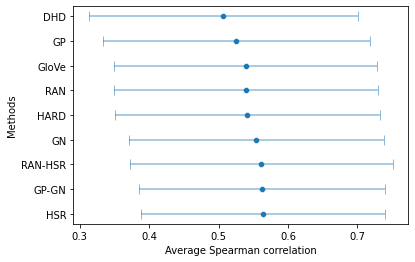

In [7]:
ax = sns.scatterplot(x="MEAN", y="METHODS", data=data)
plt.errorbar(data['MEAN'], data['METHODS'], xerr = data['STD'], fmt = 'none', capsize=5, alpha=0.5)
plt.xlabel("Average Spearman correlation")
plt.ylabel("Methods")
plt.savefig('similarity.png', bbox_inches='tight')
plt.show()

In [8]:
ran=pd.read_csv('../RAN-Debias-master/ran.csv')
gp=pd.read_csv('../gp_debias-master/gp.csv')
gpgn=pd.read_csv('../gp_debias-master/gpgn.csv')
gn=pd.read_csv('../gn_glove-master/gn.csv')
hsr=pd.read_csv('../GenderBiasHSR-master/hsr.csv')
hard = pd.read_csv('../debiaswe-master/hard.csv')
dhd = pd.read_csv('../Double-Hard-Debias-master/dhd.csv') 
hsrran = pd.read_csv('../GenderBiasHSR-master/hsr_ran.csv')

In [10]:
data_frames=[ran,gp,gn,gpgn,hsr,hard,dhd, hsrran]

In [11]:
from functools import reduce

In [12]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Unnamed: 0'],
                                            how='outer'), data_frames)

In [17]:
data = df_merged.drop('orig-glove_y', axis=1)
glove = data['orig-glove_x']
data = data.drop('orig-glove_x', axis=1)
data['glove'] = glove.iloc[:,1]
data.rename(columns = {'GPGN-glove':'GP-GN-glove'}, inplace = True)

In [19]:
data[['RAN-glove', 'GP-glove', 'GN-glove', 'GP-GN-glove', 
     'HSR-glove', 'HD-glove', 'DHD-glove', 'HSR-RAN-glove', 'glove']] = data[[
    'RAN-glove', 'GP-glove', 'GN-glove', 'GP-GN-glove', 'HSR-glove', 'HD-glove', 
    'DHD-glove', 'HSR-RAN-glove', 'glove']]*0.01
data

,Unnamed: 0,RAN-glove,GP-glove,GN-glove,GP-GN-glove,HSR-glove,HD-glove,DHD-glove,HSR-RAN-glove,glove
0,STS-2012-MSRpar,0.4157,0.3912,0.4263,0.4504,0.3862,0.4173,0.4322,0.4186,0.4205
1,STS-2012-MSRvid,0.4868,0.4702,0.5395,0.5526,0.5077,0.4897,0.4957,0.5042,0.5141
2,STS-2012-surprise.OnWN,0.5423,0.4912,0.5898,0.6516,0.6469,0.5418,0.5032,0.5874,0.5404
3,STS-2012-SMTeuroparl,0.5200,0.5026,0.5348,0.5234,0.5197,0.5198,0.5041,0.5253,0.5271
4,STS-2012-surprise.SMTnews,0.4384,0.4120,0.4549,0.4883,0.5029,0.4331,0.4505,0.4625,0.4438
5,STS-2013-FNWN,0.3489,0.3302,0.3636,0.3720,0.3434,0.3461,0.3497,0.3511,0.3520
6,STS-2013-OnWN,0.4808,0.4009,0.4674,0.5087,0.5634,0.4811,0.4514,0.5242,0.4590
7,STS-2013-headlines,0.5813,0.5637,0.6302,0.6622,0.6667,0.5804,0.5788,0.6149,0.5959
8,STS-2014-OnWN,0.5657,0.4745,0.5613,0.6093,0.6309,0.5641,0.5327,0.5993,0.5425
9,STS-2014-deft-forum,0.2572,0.2318,0.2893,0.3299,0.3578,0.2553,0.2305,0.2894,0.2570


In [20]:
data1 = data.T
data1.columns = data1.iloc[0,]
data1=data1.drop('Unnamed: 0', axis=0)

In [21]:
data1['MEAN'] = data1.mean(axis=1)
data1['STD']=data1.std(axis=1)
data1['METHODS']=data1.index

In [22]:
data1

Unnamed: 0,STS-2012-MSRpar,STS-2012-MSRvid,STS-2012-surprise.OnWN,STS-2012-SMTeuroparl,STS-2012-surprise.SMTnews,STS-2013-FNWN,STS-2013-OnWN,STS-2013-headlines,STS-2014-OnWN,STS-2014-deft-forum,...,STS-2014-images,STS-2015-answers-forums,2015-answers_students,STS-2015-belief,STS-2015-headlines,STS-2015-images,SICK,MEAN,STD,METHODS
RAN-glove,0.4157,0.4868,0.5423,0.52,0.4384,0.3489,0.4808,0.5813,0.5657,0.2572,...,0.4847,0.3227,0.5926,0.3492,0.6305,0.6039,0.6089,0.497440,0.106274,RAN-glove
GP-glove,0.3912,0.4702,0.4912,0.5026,0.412,0.3302,0.4009,0.5637,0.4745,0.2318,...,0.4325,0.2924,0.5581,0.3253,0.6207,0.5682,0.5902,0.465935,0.107742,GP-glove
GN-glove,0.4263,0.5395,0.5898,0.5348,0.4549,0.3636,0.4674,0.6302,0.5613,0.2893,...,0.5458,0.3348,0.6256,0.4092,0.663,0.6471,0.6358,0.528685,0.111785,GN-glove
GP-GN-glove,0.4504,0.5526,0.6516,0.5234,0.4883,0.372,0.5087,0.6622,0.6093,0.3299,...,0.5951,0.382,0.6632,0.5025,0.6918,0.676,0.6435,0.565475,0.113024,GP-GN-glove
HSR-glove,0.3862,0.5077,0.6469,0.5197,0.5029,0.3434,0.5634,0.6667,0.6309,0.3578,...,0.6216,0.4412,0.6841,0.562,0.7002,0.6846,0.6256,0.572110,0.113620,HSR-glove
HD-glove,0.4173,0.4897,0.5418,0.5198,0.4331,0.3461,0.4811,0.5804,0.5641,0.2553,...,0.485,0.3232,0.5954,0.3491,0.6287,0.6082,0.6123,0.497650,0.107225,HD-glove
DHD-glove,0.4322,0.4957,0.5032,0.5041,0.4505,0.3497,0.4514,0.5788,0.5327,0.2305,...,0.4983,0.3336,0.586,0.3256,0.6326,0.6147,0.6122,0.491260,0.108164,DHD-glove
HSR-RAN-glove,0.4186,0.5042,0.5874,0.5253,0.4625,0.3511,0.5242,0.6149,0.5993,0.2894,...,0.5226,0.355,0.6223,0.4064,0.6574,0.6298,0.6198,0.525560,0.107271,HSR-RAN-glove
glove,0.4205,0.5141,0.5404,0.5271,0.4438,0.352,0.459,0.5959,0.5425,0.257,...,0.5145,0.3328,0.6028,0.3628,0.6432,0.6259,0.6211,0.505140,0.108427,glove


In [23]:
data1 = data1.sort_values(by=['MEAN'])

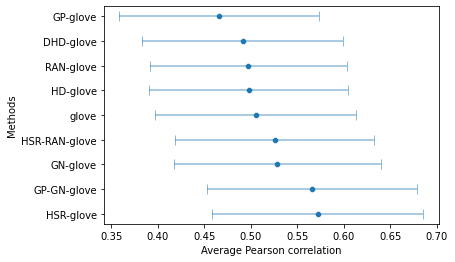

In [24]:
ax = sns.scatterplot(x="MEAN", y="METHODS", data=data1)
plt.errorbar(data1['MEAN'], data1['METHODS'], xerr = data1['STD'], fmt = 'none', capsize=5, alpha=0.5)
plt.xlabel("Average Pearson correlation")
plt.ylabel("Methods")
plt.savefig('STS.png', bbox_inches='tight')
plt.show()